In [46]:
import os
os.chdir('/home/jovyan/221-final-project/Group Assignments/Income')

In [47]:
!pip install RISE

### Importing income data for LA County

In [48]:
import pandas as pd

In [49]:
import geopandas as gpd

In [50]:
df = pd.read_csv('/home/jovyan/221-final-project/Group Assignments/Income/data/findata/ACSST5Y2023.S2503-Data.csv', low_memory=False)

In [51]:
df.shape

(2499, 555)

In [52]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [53]:
df.sample(5)

,GEO_ID,NAME,S2503_C01_001E,S2503_C01_001M,S2503_C01_002E,S2503_C01_002M,S2503_C01_003E,S2503_C01_003M,S2503_C01_004E,S2503_C01_004M,S2503_C01_005E,S2503_C01_005M,S2503_C01_006E,S2503_C01_006M,S2503_C01_007E,S2503_C01_007M,S2503_C01_008E,S2503_C01_008M,S2503_C01_009E,S2503_C01_009M,S2503_C01_010E,S2503_C01_010M,S2503_C01_011E,S2503_C01_011M,S2503_C01_012E,S2503_C01_012M,S2503_C01_013E,S2503_C01_013M,S2503_C01_014E,S2503_C01_014M,S2503_C01_015E,S2503_C01_015M,S2503_C01_016E,S2503_C01_016M,S2503_C01_017E,S2503_C01_017M,S2503_C01_018E,S2503_C01_018M,S2503_C01_019E,S2503_C01_019M,S2503_C01_020E,S2503_C01_020M,S2503_C01_021E,S2503_C01_021M,S2503_C01_022E,S2503_C01_022M,S2503_C01_023E,S2503_C01_023M,S2503_C01_024E,S2503_C01_024M,S2503_C01_025E,S2503_C01_025M,S2503_C01_026E,S2503_C01_026M,S2503_C01_027E,S2503_C01_027M,S2503_C01_028E,S2503_C01_028M,S2503_C01_029E,S2503_C01_029M,S2503_C01_030E,S2503_C01_030M,S2503_C01_031E,S2503_C01_031M,S2503_C01_032E,S2503_C01_032M,S2503_C01_033E,S2503_C01_033M,S2503_C01_034E,S2503_C01_034M,S2503_C01_035E,S2503_C01_035M,S2503_C01_036E,S2503_C01_036M,S2503_C01_037E,S2503_C01_037M,S2503_C01_038E,S2503_C01_038M,S2503_C01_039E,S2503_C01_039M,S2503_C01_040E,S2503_C01_040M,S2503_C01_041E,S2503_C01_041M,S2503_C01_042E,S2503_C01_042M,S2503_C01_043E,S2503_C01_043M,S2503_C01_044E,S2503_C01_044M,S2503_C01_045E,S2503_C01_045M,S2503_C01_046E,S2503_C01_046M,S2503_C02_001E,S2503_C02_001M,S2503_C02_002E,S2503_C02_002M,S2503_C02_003E,S2503_C02_003M,S2503_C02_004E,S2503_C02_004M,S2503_C02_005E,S2503_C02_005M,S2503_C02_006E,S2503_C02_006M,S2503_C02_007E,S2503_C02_007M,S2503_C02_008E,S2503_C02_008M,S2503_C02_009E,S2503_C02_009M,S2503_C02_010E,S2503_C02_010M,S2503_C02_011E,S2503_C02_011M,S2503_C02_012E,S2503_C02_012M,S2503_C02_013E,S2503_C02_013M,S2503_C02_014E,S2503_C02_014M,S2503_C02_015E,S2503_C02_015M,S2503_C02_016E,S2503_C02_016M,S2503_C02_017E,S2503_C02_017M,S2503_C02_018E,S2503_C02_018M,S2503_C02_019E,S2503_C02_019M,S2503_C02_020E,S2503_C02_020M,S2503_C02_021E,S2503_C02_021M,S2503_C02_022E,S2503_C02_022M,S2503_C02_023E,S2503_C02_023M,S2503_C02_024E,S2503_C02_024M,S2503_C02_025E,S2503_C02_025M,S2503_C02_026E,S2503_C02_026M,S2503_C02_027E,S2503_C02_027M,S2503_C02_028E,S2503_C02_028M,S2503_C02_029E,S2503_C02_029M,S2503_C02_030E,S2503_C02_030M,S2503_C02_031E,S2503_C02_031M,S2503_C02_032E,S2503_C02_032M,S2503_C02_033E,S2503_C02_033M,S2503_C02_034E,S2503_C02_034M,S2503_C02_035E,S2503_C02_035M,S2503_C02_036E,S2503_C02_036M,S2503_C02_037E,S2503_C02_037M,S2503_C02_038E,S2503_C02_038M,S2503_C02_039E,S2503_C02_039M,S2503_C02_040E,S2503_C02_040M,S2503_C02_041E,S2503_C02_041M,S2503_C02_042E,S2503_C02_042M,S2503_C02_043E,S2503_C02_043M,S2503_C02_044E,S2503_C02_044M,S2503_C02_045E,S2503_C02_045M,S2503_C02_046E,S2503_C02_046M,S2503_C03_001E,S2503_C03_001M,S2503_C03_002E,S2503_C03_002M,S2503_C03_003E,S2503_C03_003M,S2503_C03_004E,S2503_C03_004M,S2503_C03_005E,S2503_C03_005M,S2503_C03_006E,S2503_C03_006M,S2503_C03_007E,S2503_C03_007M,S2503_C03_008E,S2503_C03_008M,S2503_C03_009E,S2503_C03_009M,S2503_C03_010E,S2503_C03_010M,S2503_C03_011E,S2503_C03_011M,S2503_C03_012E,S2503_C03_012M,S2503_C03_013E,S2503_C03_013M,S2503_C03_014E,S2503_C03_014M,S2503_C03_015E,S2503_C03_015M,S2503_C03_016E,S2503_C03_016M,S2503_C03_017E,S2503_C03_017M,S2503_C03_018E,S2503_C03_018M,S2503_C03_019E,S2503_C03_019M,S2503_C03_020E,S2503_C03_020M,S2503_C03_021E,S2503_C03_021M,S2503_C03_022E,S2503_C03_022M,S2503_C03_023E,S2503_C03_023M,S2503_C03_024E,S2503_C03_024M,S2503_C03_025E,S2503_C03_025M,S2503_C03_026E,S2503_C03_026M,S2503_C03_027E,S2503_C03_027M,S2503_C03_028E,S2503_C03_028M,S2503_C03_029E,S2503_C03_029M,S2503_C03_030E,S2503_C03_030M,S2503_C03_031E,S2503_C03_031M,S2503_C03_032E,S2503_C03_032M,S2503_C03_033E,S2503_C03_033M,S2503_C03_034E,S2503_C03_034M,S2503_C03_035E,S2503_C03_035M,S2503_C03_036E,S2503_C03_036M,S2503_C03_037E,S2503_C03_037M,S2503_C03_038E,S2503_C03_038M,S2503_C03_039E,S2503_C03_039M,S2503_C03_040E,S2503_C03_040M,S2503_C03_041E,S2503_C03_04

In [54]:
df.GEO_ID.head()

0               Geography
1    1400000US06037101110
2    1400000US06037101122
3    1400000US06037101220
4    1400000US06037101221
Name: GEO_ID, dtype: object

### Extracting FIPS codes

In [55]:
df['FIPS'] = df['GEO_ID'].str[-11:]

In [56]:
print(df[['GEO_ID', 'FIPS']].head())

                 GEO_ID         FIPS
0             Geography    Geography
1  1400000US06037101110  06037101110
2  1400000US06037101122  06037101122
3  1400000US06037101220  06037101220
4  1400000US06037101221  06037101221


### Cleaning and reducing data

In [57]:
df.columns[df.isna().all()].tolist()

['Unnamed: 554']

In [58]:
df = df.dropna(axis=1,how="all")

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Columns: 555 entries, GEO_ID to FIPS
dtypes: object(555)
memory usage: 10.6+ MB


In [60]:
columns_to_keep = ['FIPS',
                   'S2503_C01_013E',
                   'S2503_C01_024E',
                   'S2503_C02_013E',
                   'S2503_C02_024E',
                   'S2503_C03_013E',
                   'S2503_C03_024E',
                   'S2503_C04_013E',
                   'S2503_C04_024E',
                   'S2503_C05_013E',
                   'S2503_C05_024E',
                    'S2503_C06_013E',
                   'S2503_C06_024E']
df2 = df[columns_to_keep]

In [61]:
df2.columns= ['FIPS',
'MedHHIncome_All',
'MonthlyCosts_All',
'MedHHIncome_OwnerOccupied',
'MonthlyCosts_OwnerOccupied',
'MedHHIncome_RenterOccupied',
'MonthlyCosts_RenterOccupied',
'MedHHIncome_Mixed',
'MonthlyCosts_Mixed',
'MedHHIncome_NoMortgage',
'MonthlyCosts_NoMortgage',
'MedHHIncome_Mortgage',
'MonthlyCosts_Mortgage']





In [62]:
df2.sample(5)

,FIPS,MedHHIncome_All,MonthlyCosts_All,MedHHIncome_OwnerOccupied,MonthlyCosts_OwnerOccupied,MedHHIncome_RenterOccupied,MonthlyCosts_RenterOccupied,MedHHIncome_Mixed,MonthlyCosts_Mixed,MedHHIncome_NoMortgage,MonthlyCosts_NoMortgage,MedHHIncome_Mortgage,MonthlyCosts_Mortgage
1946,06037570305,58333,1614,58333,1614,63636,1122,63636,1122,57167,1760,57167,1760
1326,06037407202,90682,1223,90682,1223,91818,1125,91818,1125,-,2064,-,2064
1861,06037551401,85938,1977,85938,1977,119181,2702,119181,2702,69656,1751,69656,1751
2129,06037603008,61500,1218,61500,1218,91478,-,91478,-,53529,1252,53529,1252
1253,06037403328,102853,2419,102853,2419,104199,2269,104199,2269,75000,2629,75000,2629


In [63]:
print (df2.dtypes)

FIPS                           object
MedHHIncome_All                object
MonthlyCosts_All               object
MedHHIncome_OwnerOccupied      object
MonthlyCosts_OwnerOccupied     object
MedHHIncome_RenterOccupied     object
MonthlyCosts_RenterOccupied    object
MedHHIncome_Mixed              object
MonthlyCosts_Mixed             object
MedHHIncome_NoMortgage         object
MonthlyCosts_NoMortgage        object
MedHHIncome_Mortgage           object
MonthlyCosts_Mortgage          object
dtype: object


In [64]:
columns_to_convert = ['MedHHIncome_All',
'MonthlyCosts_All',
'MedHHIncome_OwnerOccupied',
'MonthlyCosts_OwnerOccupied',
'MedHHIncome_RenterOccupied',
'MonthlyCosts_RenterOccupied',
'MedHHIncome_Mixed',
'MonthlyCosts_Mixed',
'MedHHIncome_NoMortgage',
'MonthlyCosts_NoMortgage',
'MedHHIncome_Mortgage',
'MonthlyCosts_Mortgage']


In [65]:
# Ensure df2 is an independent copy before modifying
df2 = df2.copy()

# Convert all columns except "FIPS" to numeric
columns_to_convert = [col for col in df2.columns if col != "FIPS"]
df2.loc[:, columns_to_convert] = df2[columns_to_convert].apply(pd.to_numeric, errors="coerce")

In [66]:
df2.dtypes

FIPS                           object
MedHHIncome_All                object
MonthlyCosts_All               object
MedHHIncome_OwnerOccupied      object
MonthlyCosts_OwnerOccupied     object
MedHHIncome_RenterOccupied     object
MonthlyCosts_RenterOccupied    object
MedHHIncome_Mixed              object
MonthlyCosts_Mixed             object
MedHHIncome_NoMortgage         object
MonthlyCosts_NoMortgage        object
MedHHIncome_Mortgage           object
MonthlyCosts_Mortgage          object
dtype: object

### Mapping Income Data

In [67]:
pip install geopandas folium matplotlib

Note: you may need to restart the kernel to use updated packages.


In [68]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
tracts=gpd.read_file('data/Census_Tracts_2020.geojson')
tracts.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.281 34.25592, -118.28198 34.255..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [70]:
tracts = tracts[['CT20','geometry']]
tracts.head()

,CT20,geometry
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,101220,"POLYGON ((-118.281 34.25592, -118.28198 34.255..."
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [71]:
tracts['FIPS'] ='06' + '037' + tracts['CT20']
tracts.head()

,CT20,geometry,FIPS
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122
2,101220,"POLYGON ((-118.281 34.25592, -118.28198 34.255...",06037101220
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222


In [72]:
df2 = df2.copy()

In [73]:
# Ensure df2["FIPS"] is a string, removing any unexpected values
df2 = df2[df2["FIPS"].str.isnumeric()]  # Keep only numeric values
df2["FIPS"] = df2["FIPS"].astype(float).astype(int).astype(str).str.zfill(11)

In [74]:
# Ensure tracts["FIPS"] is also a string
tracts["FIPS"] = tracts["FIPS"].astype(str)

In [75]:
# Merge the cleaned df2 with the GeoJSON tracts dataset
tracts_income = tracts.merge(df2, on="FIPS", how="left")

In [76]:
df2.sample(5)

,FIPS,MedHHIncome_All,MonthlyCosts_All,MedHHIncome_OwnerOccupied,MonthlyCosts_OwnerOccupied,MedHHIncome_RenterOccupied,MonthlyCosts_RenterOccupied,MedHHIncome_Mixed,MonthlyCosts_Mixed,MedHHIncome_NoMortgage,MonthlyCosts_NoMortgage,MedHHIncome_Mortgage,MonthlyCosts_Mortgage
562,06037203710,78333.0,1591.0,78333.0,1591.0,125357.0,2280.0,125357.0,2280.0,77212.0,1523.0,77212.0,1523.0
1989,06037573102,112054.0,1813.0,112054.0,1813.0,165431.0,3091.0,165431.0,3091.0,66358.0,1649.0,66358.0,1649.0
2287,06037800202,237750.0,NaN,237750.0,NaN,247708.0,NaN,247708.0,NaN,NaN,NaN,NaN,NaN
1088,06037296901,62668.0,1595.0,62668.0,1595.0,130125.0,2366.0,130125.0,2366.0,52500.0,1572.0,52500.0,1572.0
535,06037199201,64167.0,1270.0,64167.0,1270.0,NaN,486.0,NaN,486.0,54271.0,1412.0,54271.0,1412.0


In [77]:
tracts.sample(5)

,CT20,geometry,FIPS
1982,572600,"POLYGON ((-118.21769 33.81165, -118.21868 33.8...",06037572600
180,122121,"POLYGON ((-118.36434 34.21569, -118.3649 34.21...",06037122121
8,102104,"POLYGON ((-118.34081 34.22422, -118.3413 34.22...",06037102104
2205,651002,"POLYGON ((-118.31993 33.80693, -118.31993 33.8...",06037651002
1666,531502,"POLYGON ((-118.16891 34.01569, -118.16882 34.0...",06037531502


In [97]:
tracts_income.sample(5)

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
510,511,195202,1952.02,9.450220e+06,14520.094325,"POLYGON ((-13166872.733 4043359.254, -13167063..."
1582,1583,500800,5008.00,2.098593e+07,19048.036016,"POLYGON ((-13144097.428 4026831.146, -13144141..."
8,9,102104,1021.04,1.785120e+07,27555.466360,"POLYGON ((-13173638.622 4058948.755, -13173693..."
1675,1676,531901,5319.01,8.297934e+06,11917.918380,"POLYGON ((-13151743.409 4031170.068, -13151751..."
768,769,224420,2244.20,3.860570e+06,8969.152872,"POLYGON ((-13166258.916 4033229.931, -13166257..."


<Axes: >

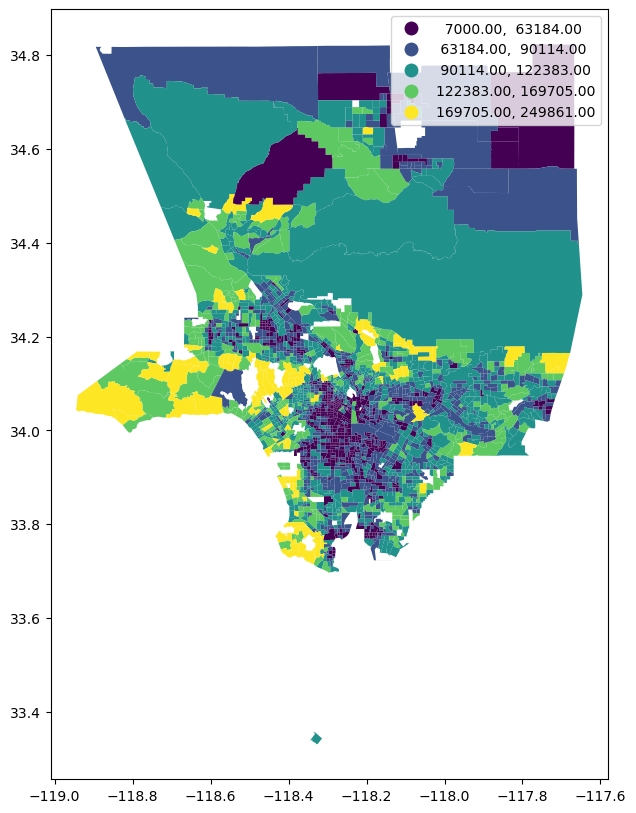

In [79]:
tracts_income.plot(figsize=(12,10),
                 column='MedHHIncome_All',
                 legend=True, 
                 scheme='naturalbreaks')

<Axes: >

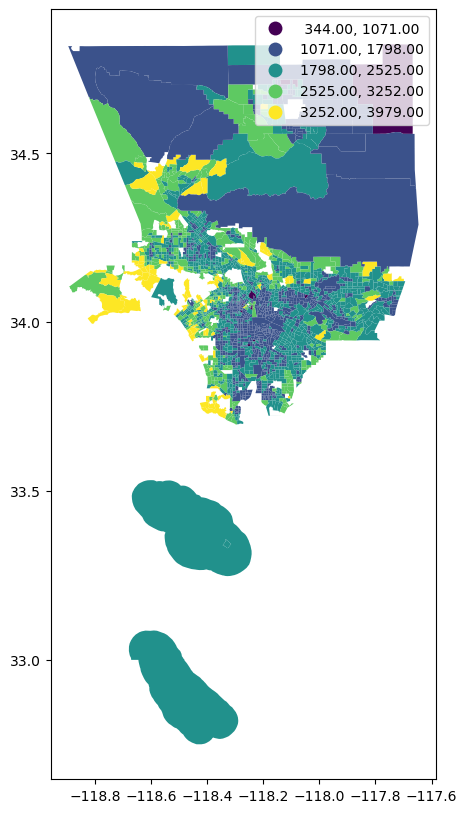

In [80]:
tracts_income.plot(figsize=(12,10),
                 column='MonthlyCosts_All',
                 legend=True, 
                 scheme='equal_interval')

### I am interested in plotting monthly housing costs as a percentage of monthly income

In [81]:
#Adding new column: # Avoid division by zero (replace zero or NaN incomes with NaN)
tracts_income["HousingCostPercentage"] = (
    (tracts_income["MonthlyCosts_All"] / (tracts_income["MedHHIncome_All"] / 12)) * 100
)


<Axes: >

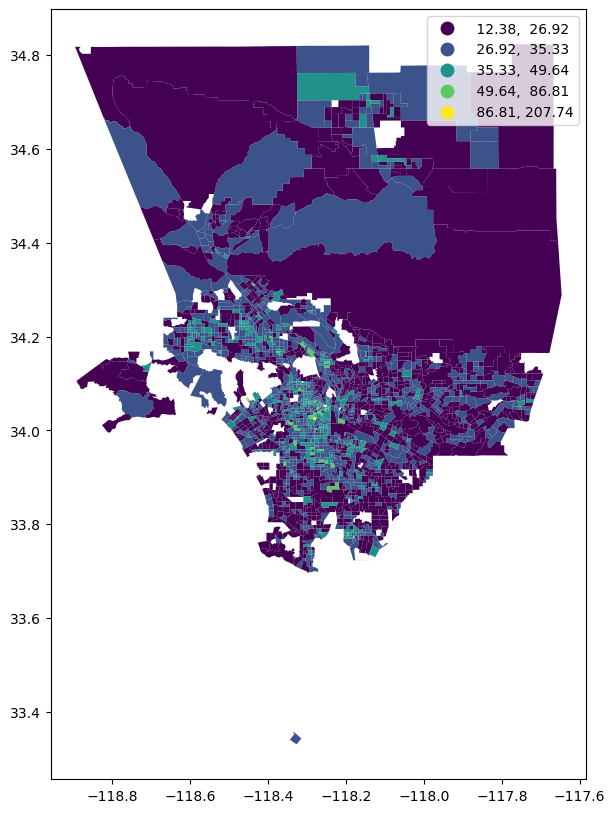

In [82]:
tracts_income.plot(figsize=(12,10),
                 column='HousingCostPercentage',
                 legend=True, 
                 scheme='naturalbreaks')

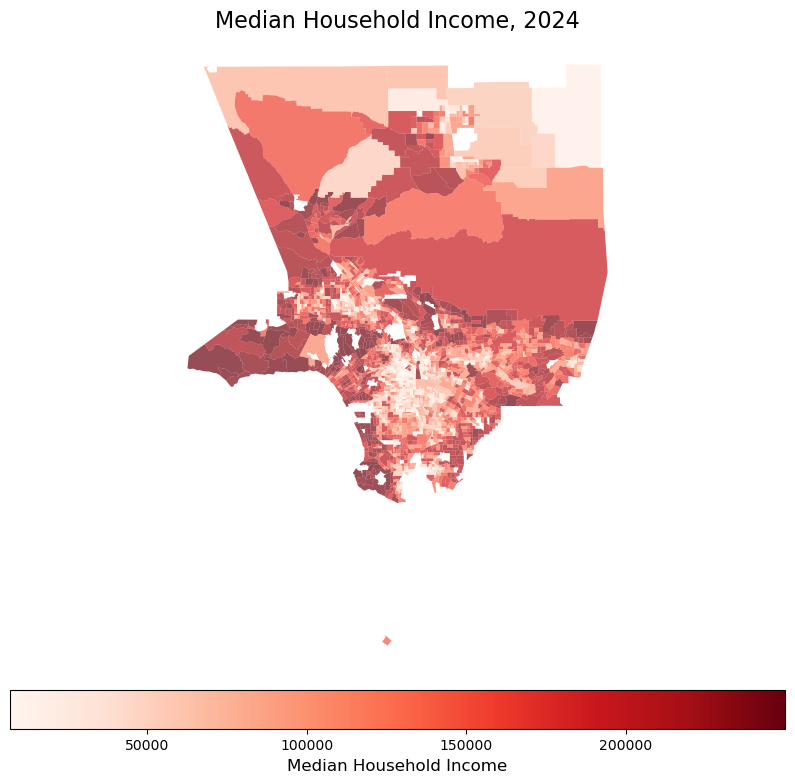

In [83]:
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib as mpl

# Assuming 'tracts_income' is already your GeoDataFrame

# Create the figure and axis with adjusted size
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the data, using the 'MedHHIncome_All' column to set the color
# Use 'Reds' or any other color map you prefer
gdf_plot = tracts_income.plot(
    ax=ax,
    column='MedHHIncome_All',  # Column to be used for coloring
    cmap='Reds',  # Color map for gradient
    legend=False,  # Disable default legend
    alpha=0.7  # Make the polygons slightly transparent for better visibility
)

# Add a colorbar (this acts as the gradient bar)
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=tracts_income['MedHHIncome_All'].min(), vmax=tracts_income['MedHHIncome_All'].max()))
sm.set_array([])  # We don't need any data associated with the colorbar
cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', pad=0.02)
cbar.set_label('Median Household Income', fontsize=12)

# Title and styling
ax.set_title('Median Household Income, 2024', fontsize=16)
ax.axis('off')  # Remove axis for better visualization

# Save the plot to a file with adjusted DPI and size
plt.savefig('MedHHIncome.jpg', dpi=150, bbox_inches='tight')

# Show the plot
plt.show()


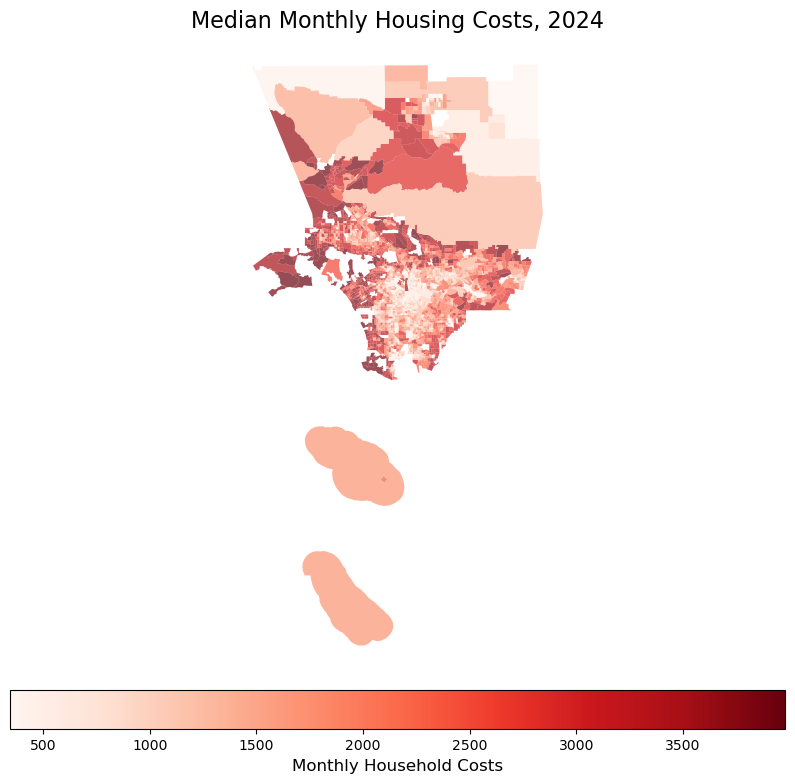

In [84]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the data, using the 'MedHHIncome_All' column to set the color
# Use 'Reds' or any other color map you prefer
gdf_plot = tracts_income.plot(
    ax=ax,
    column='MonthlyCosts_All',  # Column to be used for coloring
    cmap='Reds',  # Color map for gradient
    legend=False,  # Disable default legend
    alpha=0.7  # Make the polygons slightly transparent for better visibility
)

# Add a colorbar (this acts as the gradient bar)
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=tracts_income['MonthlyCosts_All'].min(), vmax=tracts_income['MonthlyCosts_All'].max()))
sm.set_array([])  # We don't need any data associated with the colorbar
cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', pad=0.02)
cbar.set_label('Monthly Household Costs', fontsize=12)

# Title and styling
ax.set_title('Median Monthly Housing Costs, 2024', fontsize=16)
ax.axis('off')  # Remove axis for better visualization

# Save the plot to a file with adjusted DPI and size
plt.savefig('MedHHCosts.jpg', dpi=150, bbox_inches='tight')

# Show the plot
plt.show()


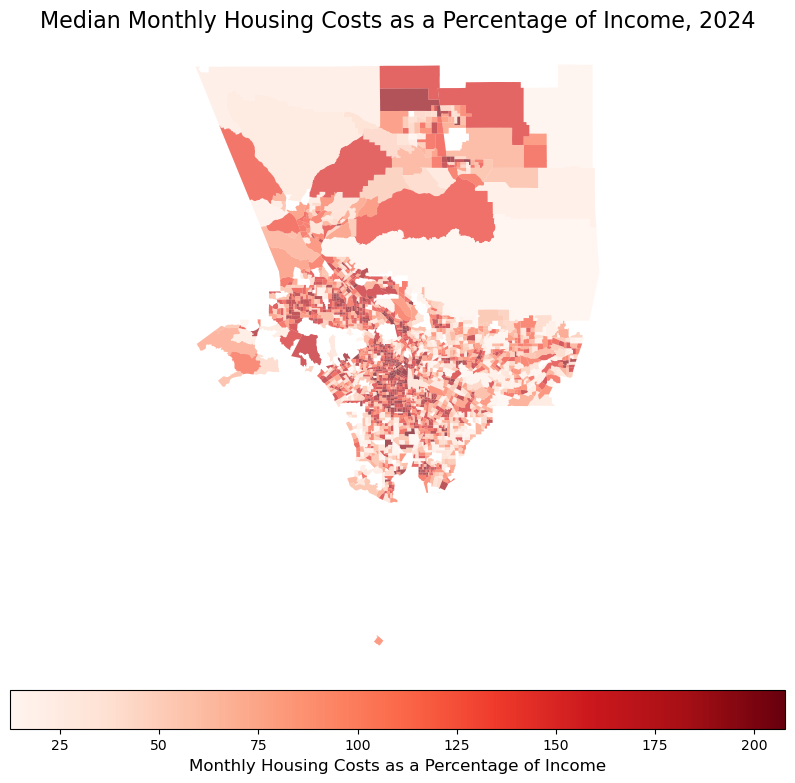

In [85]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the data, using the 'MedHHIncome_All' column to set the color
# Use 'Reds' or any other color map you prefer
gdf_plot = tracts_income.plot(
    ax=ax,
    column='HousingCostPercentage',  # Column to be used for coloring
    cmap='Reds',  # Color map for gradient
    legend=False,  # Disable default legend
    alpha=0.7  # Make the polygons slightly transparent for better visibility
)

# Add a colorbar (this acts as the gradient bar)
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=tracts_income['HousingCostPercentage'].min(), vmax=tracts_income['HousingCostPercentage'].max()))
sm.set_array([])  # We don't need any data associated with the colorbar
cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', pad=0.02)
cbar.set_label('Monthly Housing Costs as a Percentage of Income', fontsize=12)

# Title and styling
ax.set_title('Median Monthly Housing Costs as a Percentage of Income, 2024', fontsize=16)
ax.axis('off')  # Remove axis for better visualization

# Save the plot to a file with adjusted DPI and size
plt.savefig('MedHHCostsIncome.jpg', dpi=150, bbox_inches='tight')

# Show the plot
plt.show()


In [86]:
df2.sample()

,FIPS,MedHHIncome_All,MonthlyCosts_All,MedHHIncome_OwnerOccupied,MonthlyCosts_OwnerOccupied,MedHHIncome_RenterOccupied,MonthlyCosts_RenterOccupied,MedHHIncome_Mixed,MonthlyCosts_Mixed,MedHHIncome_NoMortgage,MonthlyCosts_NoMortgage,MedHHIncome_Mortgage,MonthlyCosts_Mortgage
2360,06037910215,87500.0,1977.0,87500.0,1977.0,128516.0,2176.0,128516.0,2176.0,46739.0,1599.0,46739.0,1599.0


KeyError: 'MedHHIncome_All'

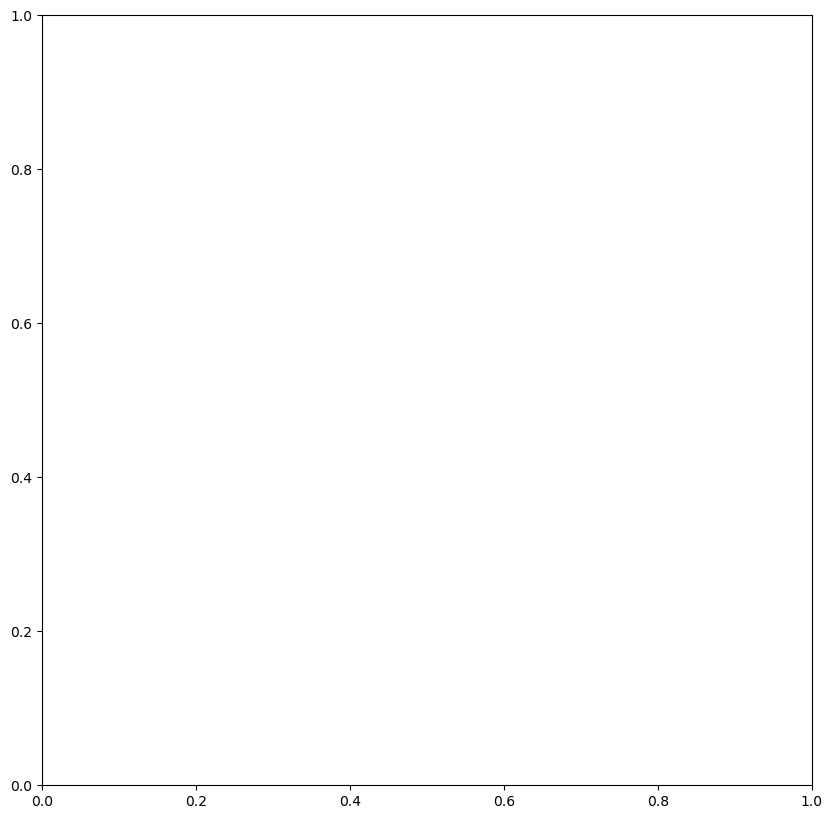

In [93]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Function to filter data based on bounding box
def filter_by_bounding_box(gdf, bounds):
    return gdf[
        (gdf.geometry.centroid.y >= bounds["min_lat"]) &
        (gdf.geometry.centroid.y <= bounds["max_lat"]) &
        (gdf.geometry.centroid.x >= bounds["min_lon"]) &
        (gdf.geometry.centroid.x <= bounds["max_lon"])
    ]

# Function to plot the map
def plot_static_map(gdf, title, filename, cmap="Reds"):
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plot the data, using 'MedHHIncome_All' column to set the color
    gdf_plot = gdf.plot(
        ax=ax,
        column='MedHHIncome_All',  # Column to be used for coloring
        cmap=cmap,  # Color map for gradient
        legend=False,  # Disable default legend
        alpha=0.7  # Make the polygons slightly transparent for better visibility
    )

    # Add a colorbar (this acts as the gradient bar)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=gdf['MedHHIncome_All'].min(), vmax=gdf['MedHHIncome_All'].max()))
    sm.set_array([])  # We don't need any data associated with the colorbar
    cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', pad=0.02)
    cbar.set_label('Median Household Income', fontsize=12)

    # Title and styling
    ax.set_title(title, fontsize=16)
    ax.axis('off')  # Remove axis for better visualization

    # Save the plot to a file with adjusted DPI and size
    plt.savefig(filename, dpi=150, bbox_inches='tight')
    plt.show()

# Define bounding boxes for Downtown LA and South Central LA
downtown_bounds = {
    "min_lat": 34.03, "max_lat": 34.07,  # Adjust these as needed
    "min_lon": -118.27, "max_lon": -118.23
}

south_central_bounds = {
    "min_lat": 33.96, "max_lat": 34.01,  # Adjust these as needed
    "min_lon": -118.30, "max_lon": -118.25
}

# Load data and reproject GeoDataFrame to a projected CRS for filtering
tracts_income = gpd.read_file("data/Census_Tracts_2020.geojson")  # Correct path to your GeoJSON
tracts_income = tracts_income.to_crs(epsg=3857)

# Filter data for Downtown LA and South Central LA
downtown_gdf = filter_by_bounding_box(tracts_income, downtown_bounds)
south_central_gdf = filter_by_bounding_box(tracts_income, south_central_bounds)

# Plot Countywide Map
plot_static_map(tracts_income, "Median Household Income - LA County, 2024", "/home/jovyan/work/output/la_county_income.jpg")

# Plot Downtown LA Map
plot_static_map(downtown_gdf, "Median Household Income - Downtown LA, 2024", "/home/jovyan/work/output/downtown_income.jpg")

# Plot South Central LA Map
plot_static_map(south_central_gdf, "Median Household Income - South Central LA, 2024", "/home/jovyan/work/output/south_central_income.jpg")


In [96]:
tracts_income.sample(1)

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
2146,2147,604002,6040.02,7.004317e+06,10362.943829,"POLYGON ((-13174925.473 4012722.016, -13174962..."
